# Data exploration


Let's load our data and explore its content

In [2]:
import pandas as pd
import numpy as np

anime_df = pd.read_csv('data/anime.csv')
rating_df = pd.read_csv('data/rating.csv')

## Anime csv

Here is how might look our anime table

In [3]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
anime_df.shape

(12294, 7)

As we can see we have 12294 animes and 7 features for each anime.

In [5]:
anime = anime_df.loc[:,["anime_id","name"]]

In [5]:
anime

,anime_id,name
0,32281,Kimi no Na wa.
1,5114,Fullmetal Alchemist: Brotherhood
2,28977,Gintama°
3,9253,Steins;Gate
4,9969,Gintama&#039;
...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami
12290,5543,Under World
12291,5621,Violence Gekiga David no Hoshi
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...


**Check if there's none values** 

In [75]:
anime_df.name.isna().value_counts()

name
False    12294
Name: count, dtype: int64

In [76]:
anime_df.genre.isna().value_counts()

genre
False    12232
True        62
Name: count, dtype: int64

In [77]:
anime_df.type.isna().value_counts()

type
False    12269
True        25
Name: count, dtype: int64

In [78]:
anime_df.episodes.isna().value_counts()

episodes
False    12294
Name: count, dtype: int64

In [79]:
anime_df.rating.isna().value_counts()

rating
False    12064
True       230
Name: count, dtype: int64

In [80]:
anime_df.members.isna().value_counts()

members
False    12294
Name: count, dtype: int64

In [81]:
anime_df.anime_id.isna().value_counts()

anime_id
False    12294
Name: count, dtype: int64

In [82]:
anime_df.isna().value_counts()

anime_id  name   genre  type   episodes  rating  members
False     False  False  False  False     False   False      12017
                                         True    False        193
                 True   False  False     False   False         47
                 False  True   False     True    False         22
                 True   False  False     True    False         12
                        True   False     True    False          3
Name: count, dtype: int64

**Fill none values** 

> 62/12294 none value for genre

> 25/12294 none value for type

> 230/12294 none value for rating: we cannot rely on them 



In [83]:
new_df = anime_df.dropna()

In [84]:
new_df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [85]:
new_df.genre.isna().value_counts()

genre
False    12017
Name: count, dtype: int64

**Handle genre attribute**

Since the genre attribute has multiple values for one single film, we want to represent these unique values as attributes with the value 0 or 1, 

indicating whether the film belongs to that genre or not.


In [86]:
# split 'genre' column by comas to create a list of genres 
new_df['genre'] = new_df['genre'].str.split(', ')
new_df


C:\Users\hp\AppData\Local\Temp\ipykernel_9692\2536743112.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['genre'] = new_df['genre'].str.split(', ')


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy, Magic, Mil...",TV,64,9.26,793665
2,28977,Gintama°,"[Action, Comedy, Historical, Parody, Samurai, ...",TV,51,9.25,114262
3,9253,Steins;Gate,"[Sci-Fi, Thriller]",TV,24,9.17,673572
4,9969,Gintama&#039;,"[Action, Comedy, Historical, Parody, Samurai, ...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,[Hentai],OVA,1,4.15,211
12290,5543,Under World,[Hentai],OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,[Hentai],OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,[Hentai],OVA,1,4.98,175


In [92]:
# Apply MultiLabel Binarizer to one-hot encode to genres

from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
genre_encoded = pd.DataFrame(mlb.fit_transform(new_df['genre']), columns=mlb.classes_, index=new_df.index)

print(genre_encoded.shape)
print(genre_encoded.columns)

(12017, 43)
Index(['Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama',
       'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai', 'Historical', 'Horror',
       'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music',
       'Mystery', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai',
       'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen',
       'Shounen Ai', 'Slice of Life', 'Space', 'Sports', 'Super Power',
       'Supernatural', 'Thriller', 'Vampire', 'Yaoi', 'Yuri'],
      dtype='object')


In [93]:
# Concatenate the encoded genres back to the original dataframe
anime_encoded = pd.concat([anime_df, genre_encoded], axis=1)

# Now you can drop the original 'genre' column if you no longer need it
anime_encoded = anime_encoded.drop(columns=['genre'])

anime_encoded.head()

,anime_id,name,type,episodes,rating,members,Action,Adventure,Cars,Comedy,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,32281,Kimi no Na wa.,Movie,1,9.37,200630,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,5114,Fullmetal Alchemist: Brotherhood,TV,64,9.26,793665,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,28977,Gintama°,TV,51,9.25,114262,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9253,Steins;Gate,TV,24,9.17,673572,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,9969,Gintama&#039;,TV,51,9.16,151266,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Rating csv

In [6]:
rating_df.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [3]:
data = pd.merge(rating_df, anime)

NameError: name 'anime' is not defined

In [13]:
data

,user_id,anime_id,rating,name
0,1,20,-1,Naruto
1,1,24,-1,School Rumble
2,1,79,-1,Shuffle!
3,1,226,-1,Elfen Lied
4,1,241,-1,Girls Bravo: First Season
...,...,...,...,...
7813722,73515,16512,7,Devil Survivor 2 The Animation
7813723,73515,17187,9,Ghost in the Shell: Arise - Border:1 Ghost Pain
7813724,73515,22145,10,Kuroshitsuji: Book of Circus
7813725,73516,790,9,Ergo Proxy


In [14]:
# lets make a pivot table in order to make rows are users and columns are movies. And values are rating
pivot_table = data.pivot_table(index = ["anime_id"],columns = ["name"],values = "rating")
pivot_table.head(10)

name,&quot;0&quot;,"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,...,makemagic,"on-chan, Yume Power Daibouken!",s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,◯
anime_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
movie_watched = pivot_table["vivi"]
similarity_with_other_movies = pivot_table.corrwith(movie_watched)  # find correlation between "Bad Boys (1995)" and other movies
similarity_with_other_movies = similarity_with_other_movies.sort_values(ascending=False)
similarity_with_other_movies.head()

c:\Users\hp\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\hp\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\hp\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


name
&quot;0&quot;                                                      NaN
&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu   NaN
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi                NaN
&quot;Bungaku Shoujo&quot; Memoire                                 NaN
&quot;Bungaku Shoujo&quot; Movie                                   NaN
dtype: float64

In [4]:
rating_df.shape

(7813737, 3)

In [5]:
rating_df.value_counts().sum()

7813737

In [6]:
rating_df.rating.value_counts()

rating
 8     1646019
-1     1476496
 7     1375287
 9     1254096
 10     955715
 6      637775
 5      282806
 4      104291
 3       41453
 2       23150
 1       16649
Name: count, dtype: int64

In [7]:
popular_products = pd.DataFrame(rating_df.groupby('anime_id')['rating'].count())
most_popular = popular_products.sort_values('rating', ascending=False)
most_popular.head(10)

,rating
anime_id,
1535,39340
11757,30583
16498,29584
1575,27718
226,27506
6547,27183
20,25925
121,25032
5114,24574


<Axes: xlabel='anime_id'>

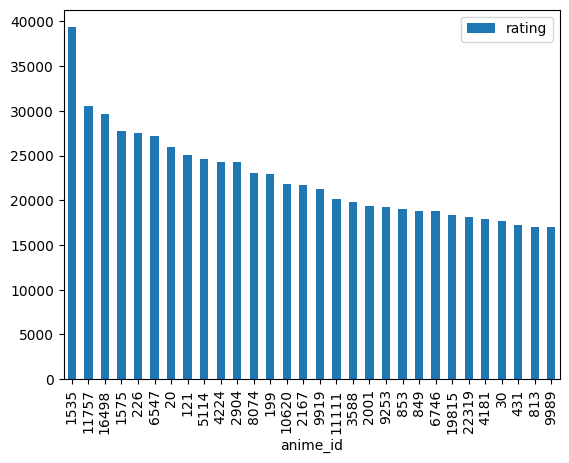

In [8]:
most_popular.head(30).plot(kind = "bar")


1476496 missing rating


In [97]:
rating_df.rating.isna().value_counts()

rating
False    7813737
Name: count, dtype: int64

In [100]:
# Drop rows where the rating is -1
rating_df = rating_df[rating_df['rating'] != -1]  
rating_df.rating.isna().value_counts()   

rating
False    6337241
Name: count, dtype: int64

In [101]:
rating_df.isna().value_counts()

user_id  anime_id  rating
False    False     False     6337241
Name: count, dtype: int64

In [102]:
rating_df.head()

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10


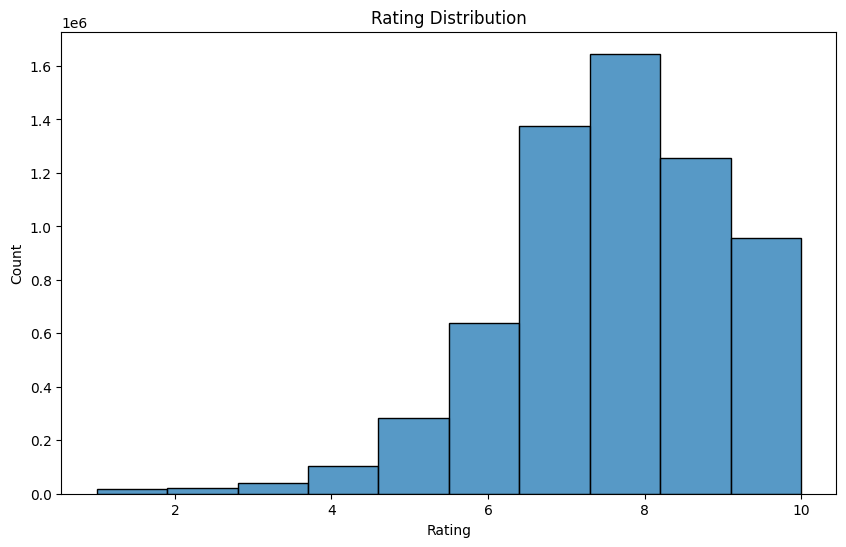

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(rating_df['rating'], bins=10, kde=False)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [105]:
# Group by anime_id and calculate the mean rating for each anime
top_rated_anime = rating_df.groupby('anime_id')['rating'].mean().sort_values(ascending=False)

# Display the top 10 rated anime
print(top_rated_anime.head(10))

anime_id
12039    10.0
22445    10.0
30743    10.0
27557    10.0
22477    10.0
9817     10.0
7245     10.0
22615    10.0
9819     10.0
9820     10.0
Name: rating, dtype: float64


In [106]:
# Group by user_id and calculate the mean rating given by each user
top_users = rating_df.groupby('user_id')['rating'].mean().sort_values(ascending=False)

# Display the top 10 users who give the highest average ratings
print(top_users.head(10))


user_id
1        10.0
55320    10.0
55186    10.0
18388    10.0
55198    10.0
55209    10.0
31994    10.0
31991    10.0
55265    10.0
55272    10.0
Name: rating, dtype: float64


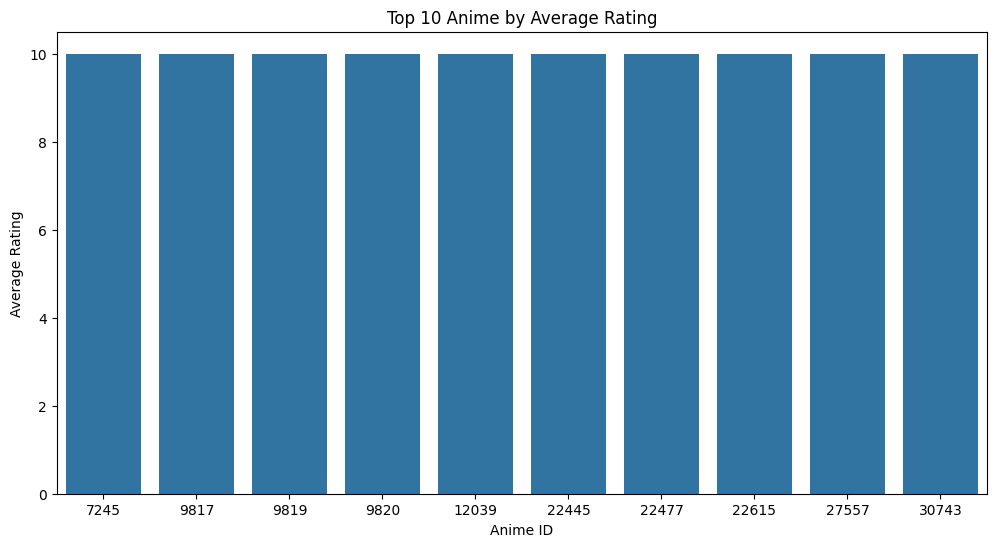

In [107]:
# Plot the top 10 rated anime (by mean rating)
top_10_anime = top_rated_anime.head(10).index

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_anime, y=rating_df[rating_df['anime_id'].isin(top_10_anime)].groupby('anime_id')['rating'].mean())
plt.title('Top 10 Anime by Average Rating')
plt.xlabel('Anime ID')
plt.ylabel('Average Rating')
plt.show()

In [109]:
# Create a pivot table of users vs. anime ratings
user_anime_matrix = rating_df.pivot_table(index='user_id', columns='anime_id', values='rating')

# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(user_anime_matrix, cmap="YlGnBu", cbar=True)
plt.title('User vs. Anime Ratings Heatmap')
plt.xlabel('Anime ID')
plt.ylabel('User ID')
plt.show()

KeyboardInterrupt: 

<Figure size 1200x800 with 0 Axes>

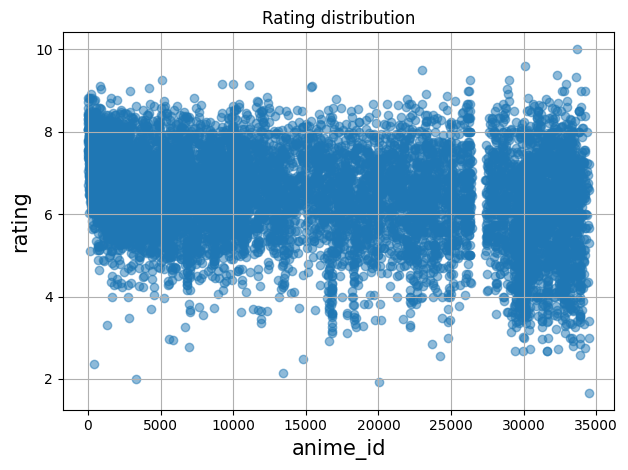

In [8]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.cbook as cbook


fig, ax = plt.subplots()
ax.scatter(anime_df['anime_id'], anime_df['rating'],alpha=0.5)

ax.set_xlabel('anime_id', fontsize=15)
ax.set_ylabel('rating', fontsize=15)
ax.set_title('Rating distribution')

ax.grid(True)
fig.tight_layout()

plt.show()

In [ ]:
encoded_anime_df = anime_df
encoded_anime_df['']

In [13]:
import seaborn as sns
#correlation matrix
corrmat = anime_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

ValueError: could not convert string to float: 'Kimi no Na wa.'

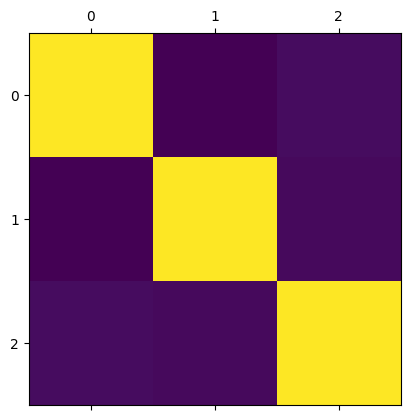

In [10]:
import matplotlib.pyplot as plt

plt.matshow(rating_df.corr())
plt.show()